# Исследование рынка российского кинопроката



**Цель исследования** - изучить рынок российского кинопроката и выявить текущие тренды.

Заказчик исследования — Министерство культуры Российской Федерации.

**Задачи**:

- изучить, как менялась динамика проката фильмов по годам;
- определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате;
- исследовать фильмы, которые получили государственную поддержку.
 
Набор входных данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Ход исследования**

Исследование пройдёт в три этапа:

1. [Обзор данных](#1)
2. [Предобработка данных](#2)
    * [Изменение типов данных и обработка пропущенных значений](#21)
    * [Обработка дубликатов](#22)
    * [Обработка аномальных значений](#23)
    * [Декомпозиция исходного датафрейма](#24)  
3. [Исследовательский анализ](#3)
4. [Вывод](#4)

## Обзор данных <a id="1"></a>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
server_path = '/datasets/'   
local_path= ''      
mov = 'mkrf_movies.csv'
sh = 'mkrf_shows.csv'
try:
    d = pd.read_csv(server_path + mov)  
    dd = pd.read_csv(server_path + sh)
except: 
    d = pd.read_csv(local_path + mov)
    dd = pd.read_csv(local_path + sh)

<Axes: >

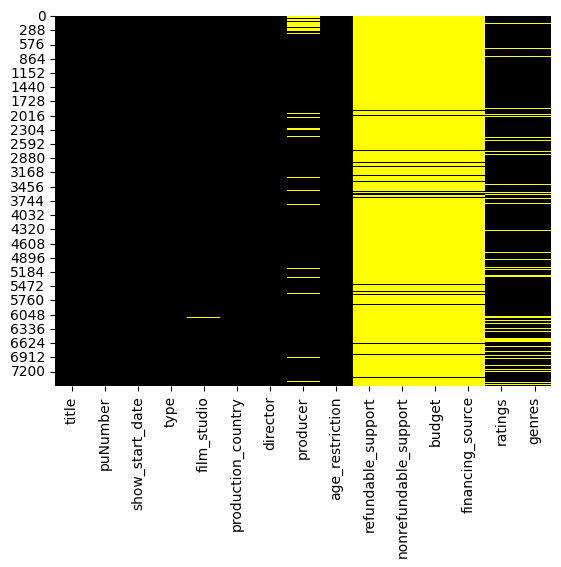

In [3]:
colors = ['black','yellow']
sns.heatmap(d.isnull(), cmap=sns.color_palette(colors), cbar=False)

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
d.isnull().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

In [5]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Объединим два датафрейма по столбцу `puNumber` так, чтобы все данные первой таблицы вошли в получившуюся. Для этого необходимо изменить тип данных этого столбца с `object` на `int`.

In [5]:
d.loc[(d['puNumber'] == "нет"), 'puNumber'] = 0 #одна из строк содержала значение, которое мешало преобразовать данные
d['puNumber'] = d['puNumber'].astype('int64')

In [6]:
data = d.merge(dd, on='puNumber', how='outer')

In [7]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [8]:
len(dd['box_office']) == pd.notna(data['box_office']).sum()

True

## Предобработка данных <a id="2"></a>

### Изменение типов данных и обработка пропущенных значений <a id="21"></a>


Проверим данные получившейся таблицы:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Заметили следущее: 

1. `puNumber` - необходимо заменить тип данных на `int32`;
2. `show_start_date` - необходимо заменить тип данных на `datetime`;
3. `director`, `producer` - пропущенные значения;
4. `refundable_support`, `nonrefundable_support` - необходимо заменить тип данных на `int32` + пропущенные значения;
5. `budget` - необходимо заменить тип данных на `int`;
6. `financing_source` - пропущенные значения;
7. `ratings` - необходимо заменить тип данных на `float` + пропущенные значения;
8. `genres` - пропущенные значения;
9. `box_office` - пропущенные значения.

Теперь можно идти по списку и исправлять неточности.

1. Изменим `puNumber` на `int32`. 

In [10]:
data['puNumber'] = data['puNumber'].astype('int32')

2. Исправим тип `show_start_date`.

In [11]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y.%m.%d')

3. Столбцы `director`, `producer` содержат нулевые значения, пропуски полностью случайные, зависимость не выявлена. Заменим на 'unkn'.

In [12]:
data['director'] = data['director'].fillna('unkn')
data['producer'] = data['producer'].fillna('unkn')

In [13]:
data[data['director'].isna()].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


6. Пропущенные значения `financing_source` наблюдаются только в случае, когда `refundable_support` и `nonrefundable_support` равны нулю, то есть гос поддержки для фильма не было. Заполним пропуски значением 'missing'.

In [14]:
data['financing_source'] = data['financing_source'].fillna('missing')

7. Заменим тип данных `ratings`. В столбце есть значения, выраженные в процентах, их необходимо преобразовать.

In [15]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [16]:
def convert_float(val):
    """
    Преобразует процентное значение строки в число с плавающей точкой:
     - удаляет %
     - преобразует в число с плавающей точкой.
     
    """
    
    percent_list = ['99%', '28%', '97%', '83%', '64%', '91%', '94%', '62%', '79%', '90%', '19%', '88%', '89%', '98%']
    
    if val in percent_list:
        new_val = int(val.replace('%', '')) / 10
    else:
        new_val = val
    
    return float(new_val)

data['ratings'] = data['ratings'].apply(convert_float)


In [17]:
data['ratings'] = data['ratings'].fillna('unkn')

8. `genres` заменим пропуски на 'unkn'.

In [18]:
data['genres'] = data['genres'].fillna('unkn')

9. В `box_office` пропуски нельзя заполнить, опираясь на значения других колонок, оставим без изменений.

Проверим преобразования:

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Удалось уменьшить количество пропусков и сэкономить память, изменив типы данных.

In [20]:
data['film_studio'] = data['film_studio'].fillna('unkn')

In [21]:
data['production_country'] = data['production_country'].fillna('Россия')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

### Обработка дубликатов <a id="22"></a>


Просмотрим уникальные значения столбцов на наличие неявных дубликатов и аномалий:

In [23]:
columns = data.columns
for c in columns:
    print(c.upper(), '\n', data[c].unique(), '\n')

TITLE 
 ['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"'] 

PUNUMBER 
 [221048915 111013716 221038416 ... 124010819 124010619 124010719] 

SHOW_START_DATE 
 <DatetimeArray>
['2015-11-27 12:00:00+00:00', '2016-09-13 12:00:00+00:00',
 '2016-10-10 12:00:00+00:00', '2016-06-10 12:00:00+00:00',
 '2015-07-29 12:00:00+00:00', '2013-10-18 12:00:00+00:00',
 '2014-12-29 12:00:00+00:00', '2016-05-05 12:00:00+00:00',
 '2014-12-01 12:00:00+00:00', '2016-06-29 12:00:00+00:00',
 ...
 '2019-12-17 12:00:00+00:00', '2019-12-10 12:00:00+00:00',
 '2019-12-16 12:00:00+00:00', '2019-12-26 12:00:00+00:00',
 '2019-12-20 12:00:00+00:00', '2019-12-27 12:00:00+00:00',
 '2019-12-23 12:00:00+00:00', '2019-12-24 12:00:00+00:00',
 '2019-12-28 12:00:00+00:00', '2019-12-30 12:00:00+00:00']
Length: 1965, dtype: datetime64[ns, UTC] 

TYPE 
 ['Художественный' 'Анимационный'

В столбце `type` обнаружены дубликаты. Исправим:

In [24]:
data['type'] = data['type'].str.strip()

In [25]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

В категориальных столбцах заметили, что через запятую перечислено много значений, это может затруднить исследовательскую работу.  Нужно преобразовать эти столбцы.

Других проблем пока не выявлено. Проверим, есть ли в данных явные дубликаты:

In [26]:
data.duplicated().sum() 

0

In [27]:
data = data.sort_values(
    by = 'box_office',
    ascending = False
    ).drop_duplicates(
    subset=['title'])

In [28]:
data['title'].duplicated().sum()

0

In [29]:
data['puNumber'].duplicated().sum()

0

### Обработка аномальных значений <a id="23"></a>

Проверим количественные столбцы на наличие аномальных значений.

Столбец `budget` уже включает в себя полный объём государственной поддержки. Стоит проверить нет ли таких фильмов, для которых бюджет оказался меньше суммарной поддержки.

In [30]:
data['sum'] = data['refundable_support']+data['nonrefundable_support']

In [31]:
data.loc[data['sum'] > data['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,sum
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09,250000000.0
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08,75000000.0
5673,Селфи,111012117,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Н.Хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,20000000.0,40000000.0,0.0,Фонд кино,5.8,"триллер,драма",2.251964e+08,60000000.0
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,80000000.0
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,160000000.0
6823,Большое путешествие,114002419,2019-04-20 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"Н.Лопато, В.Ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,60000000.0,120000000.0,0.0,Фонд кино,6.2,"мультфильм,комедия,приключения",1.476068e+08,180000000.0
5806,Два хвоста,114001018,2018-05-31 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"В.Ровенский, Н.Лопато, В.Азеев","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,10000000.0,60000000.0,0.0,Фонд кино,5.0,"мультфильм,детский",1.065143e+08,70000000.0
6008,Принцесса и дракон,114003018,2018-08-23 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,М.Нефедова,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,40000000.0,40000000.0,0.0,Фонд кино,5.2,"мультфильм,фэнтези,детский",8.336633e+07,80000000.0
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,35000000.0
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,70000000.0


Выявлено 17 строк в колонке budget со значением '0'. Эти строки составляют маленький процент от общего кол-ва строк, удалим их.

In [32]:
data = data.query('budget != 0.0')

Проверим колонку `budget` на наличие аномалий.

In [33]:
pd.options.display.float_format = '{:.2f}'.format

In [34]:
data['budget'].describe()

count          314.00
mean     131516770.51
std      185962049.92
min       14462464.00
25%       46153856.25
50%       72448592.50
75%      150000000.00
max     2305074303.00
Name: budget, dtype: float64

<AxesSubplot:>

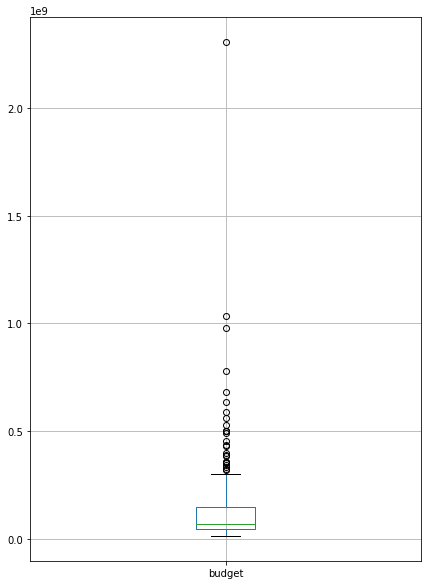

In [35]:
data.boxplot('budget', figsize = (7,10))

По диаграмме размаха видно, что выбросы начинаются со значения 350 млн., одно из значений превышает нормальные в разы. Проверим, аномалия это или реальные данные.

In [36]:
data[data['budget'] == 2305074303]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,sum
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,Фонд кино,5.80,"приключения,фэнтези",333597059.59,270000000.00


По данным кинопоиска и другим источникам бюджет фильма действительно составляет 48 млн долларов. Для проведения исследовательского анализа на данном этапе очищать данные от выбросов не будем.

Проверим другие столбцы.

In [37]:
data['refundable_support'].describe()

count         314.00
mean     11321656.05
std      24689503.57
min             0.00
25%             0.00
50%             0.00
75%      10000000.00
max     180000000.00
Name: refundable_support, dtype: float64

<AxesSubplot:>

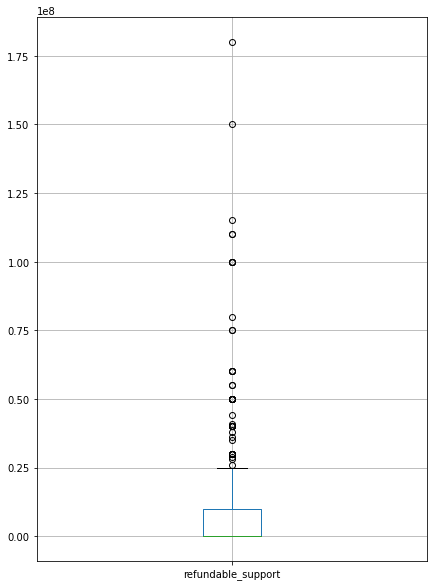

In [38]:
data.boxplot('refundable_support', figsize = (7,10))

In [39]:
data[data['refundable_support'] >= 100000000]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,sum
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,500000000.00
5569,Легенда о Коловрате,111007617,2017-11-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ИВАН""",Россия,И.Шурховецкий,"ООО ""Централ Партнершип"", АО ""Тел...",«12+» - для детей старше 12 лет,100000000.00,250000000.00,500012729.00,Фонд кино,6.40,"история,боевик,фэнтези",590405065.00,350000000.00
6472,Три богатыря и наследница престола,114008818,2018-12-15 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Бронзит,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,115000000.00,0.00,185500705.00,Фонд кино,6.50,"мультфильм,приключения,семейный",577368853.25,115000000.00
5437,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.00,190000000.00,1032905957.00,Фонд кино,7.70,"фэнтези,комедия,семейный",511775548.00,300000000.00
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,100000000.00
3351,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,150000000.00,300000000.00,684200536.00,Фонд кино,6.60,драма,364285139.60,450000000.00
3453,Ледокол,111016316,2016-10-11 12:00:00+00:00,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова""",Россия,Н.Хомерики,"И.Толстунов, С.Козлов",«12+» - для детей старше 12 лет,100000000.00,200000000.00,430000000.00,Фонд кино,6.50,драма,337069662.80,300000000.00
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,Фонд кино,5.80,"приключения,фэнтези",333597059.59,270000000.00
3164,Герой (2015),111000416,2016-01-22 12:00:00+00:00,Художественный,"ООО ""Студия 25"", ООО ""Медиа Арт Студио"", ООО ...",Россия,Ю.Васильев,"Э.Айнулова, Н.Дорошкевич, М.Журомская",«12+» - для детей старше 12 лет,110000000.00,30000000.00,222177790.00,"Министерство культуры, Фонд кино",7.10,"мюзикл,боевик,драма",81430626.82,140000000.00


Все данные в выбросах реальные, пока оставим как есть.

In [40]:
data['nonrefundable_support'].describe()

count         314.00
mean     46986365.75
std      56576755.16
min             0.00
25%      25000000.00
50%      30000000.00
75%      40000000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64

<AxesSubplot:>

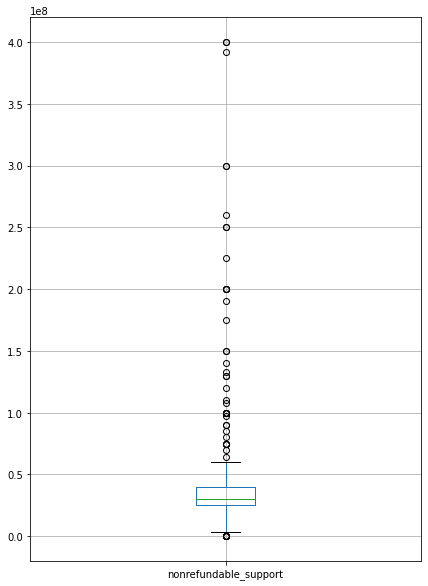

In [41]:
data.boxplot('nonrefundable_support', figsize = (7,10))

In [42]:
data[data['nonrefundable_support'] >= 100000000].sort_values(by = 'nonrefundable_support', ascending = False)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,sum
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,400000000.00,590192191.00,Фонд кино,7.50,"спорт,драма",2779686144.00,400000000.00
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,500000000.00
2920,Экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,50000000.00,392104482.00,635283867.00,Фонд кино,7.60,"драма,триллер,приключения",1402255390.00,442104482.00
6887,Девятая,111007019,2019-09-19 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Н.Хомерики,"С.Мелькумов, А.Роднянский",«16+» - для детей старше 16 лет,0.00,300000000.00,453704666.00,Фонд кино,5.80,"детектив,триллер,криминал",55876887.40,300000000.00
3351,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,150000000.00,300000000.00,684200536.00,Фонд кино,6.60,драма,364285139.60,450000000.00
5826,Тренер,111003218,2018-04-19 12:00:00+00:00,Художественный,"ООО ""ДК интертеймент"", ООО ""Киностудия ""Слово""...",Россия,Д.Козловский,"Д.Козловский, П.Ануров, Л.Верещагин, А.Златопо...",«12+» - для детей старше 12 лет,0.00,260000000.00,390191139.00,Фонд кино,6.80,"драма,спорт",820528005.21,260000000.00
5569,Легенда о Коловрате,111007617,2017-11-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ИВАН""",Россия,И.Шурховецкий,"ООО ""Централ Партнершип"", АО ""Тел...",«12+» - для детей старше 12 лет,100000000.00,250000000.00,500012729.00,Фонд кино,6.40,"история,боевик,фэнтези",590405065.00,350000000.00
2699,Он - Дракон,111017915,2015-10-14 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,И.Джендубаев,Т.Бекмамбетов,«6+» - для детей старше 6 лет,0.00,250000000.00,360000000.00,Фонд кино,6.80,фэнтези,110171448.50,250000000.00
5502,Салют-7,111006917,2017-10-01 12:00:00+00:00,Художественный,"ООО ""Лемон Филмз Студио""",Россия,К.Шипенко,"С.Сельянов, Б.Бакурадзе, А.Златопольский",«12+» - для детей старше 12 лет,0.00,225000000.00,493733957.00,Фонд кино,7.40,"драма,приключения,триллер",752679777.00,225000000.00
7290,Урфин Джюс возвращается,114004019,2019-10-14 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,Ф.Дмитриев,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,0.00,200000000.00,300000000.00,Фонд кино,6.20,"мультфильм,детский",68549523.47,200000000.00


In [43]:
data[data['nonrefundable_support'] <= 10000000].sort_values(by = 'nonrefundable_support', ascending = False)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,sum
3337,Любовь и Сакс,111001217,2017-02-16 12:00:00+00:00,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0.00,10000000.00,61000000.00,Министерство культуры,5.20,мелодрама,NaN,10000000.00
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,10000000.00,40000000.00,Министерство культуры,9.40,"фантастика,боевик,комедия",334750.00,10000000.00
3609,Все о мужчинах,111012716,2016-08-17 12:00:00+00:00,Художественный,"ООО ""Фреш-Фильм"", ООО ""Энджой мувиз""",Россия,"Л.Марголин, С.Андреасян, М.Жерневский","С.Андреасян, Г.Андреасян, А.Ананикян, М.Галуст...",«16+» - для детей старше 16 лет,10000000.00,10000000.00,31305313.00,Фонд кино,4.90,комедия,62260863.65,20000000.00
7042,Ленин Неизбежность,111010619,2019-07-01 12:00:00+00:00,Художественный,"ООО ""Студия ""Рой""",Россия,В.Хотиненко,"В.Хотиненко, Д.Литвинов",«16+» - для детей старше 16 лет,0.00,10000000.00,15010000.00,Министерство культуры,5.40,"драма,история,биография",1957979.50,10000000.00
5576,Исповедь содержанки,111007817,2017-11-30 12:00:00+00:00,Художественный,"ООО ""Корпорация Русская Фильм Группа"", ООО ""Ма...",Россия,Е.Жигаева,"ООО ""Корпорация Русская Фильм Группа"", ООО ""Ма...",«18+» - запрещено для детей,0.00,8000000.00,18166418.00,Министерство культуры,5.40,"мелодрама,криминал",270497.00,8000000.00
5600,За гранью реальности,111010817,2017-11-27 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ""",Россия,А.Богуславский,"В.Денисюк, Е.Мелентьев",«12+» - для детей старше 12 лет,0.00,6000000.00,136230333.00,Министерство культуры,5.20,"приключения,фэнтези",126713450.16,6000000.00
3732,Танцы насмерть,111013416,2016-08-31 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""ЦЕНТРОКИНО""",Россия,А.Волгин,"В.Денисюк, Е.Мелентьев",«12+» - для детей старше 12 лет,0.00,6000000.00,90278063.00,Министерство культуры,4.00,фантастика,9680744.00,6000000.00
3142,Тайна Снежной королевы,111021615,2015-12-25 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""ЗОЛОТОЙ ВЕК""",Россия,Н.Бондарчук,С.Кабанова,«6+» - для детей старше 6 лет,20000000.00,5300000.00,215860000.00,"Министерство культуры, Фонд кино",7.20,"мюзикл,фэнтези,семейный",1434072.50,25300000.00
2517,Норвег,111018215,2015-10-15 12:00:00+00:00,Художественный,"ООО ""Росмедиа Продакшн"" по заказу ООО ""МАРС МЕ...",Россия,Е.Константинова (псевдоним Алена Званцева),"Р.Дишдишян, ООО ""ММЕ""",«12+» - для детей старше 12 лет,0.00,5000000.00,28115580.00,Министерство культуры,6.30,комедия,2323980.00,5000000.00
5734,"Ну, здравствуй, Оксана Соколова!",111001118,2018-03-06 12:00:00+00:00,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова""",Россия,К.Васильев,"И.Толстунов, П.Попов, А.Рыданов",«16+» - для детей старше 16 лет,50000000.00,5000000.00,82800488.00,Фонд кино,5.80,комедия,80289852.90,55000000.00


По диаграмме размаха выбросы есть и выше, и ниже границы нормальных значений. Вторые представляют собой строки, где сумма невозвратных ср-в гос-ва равна нулю. Аномалии не выявлены.

In [44]:
data['ratings'] = data['ratings'].replace('unkn', np.nan)

In [45]:
data['ratings'].describe()

count   5798.00
mean       6.46
std        1.13
min        1.00
25%        5.80
50%        6.60
75%        7.20
max        9.90
Name: ratings, dtype: float64

<AxesSubplot:>

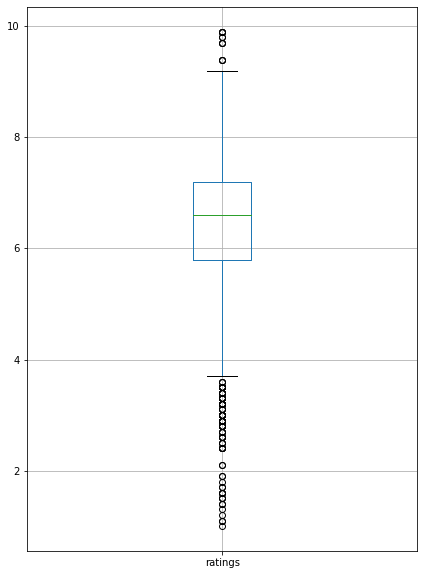

In [46]:
data.boxplot('ratings', figsize = (7,10))

In [47]:
data[data['ratings'] < 2]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,sum
3374,Дизлайк,111012516,2016-08-05 12:00:00+00:00,Художественный,"ООО ""Ангел""",Россия,П.Руминов,"П.Руминов, И.Капитонов",«18+» - запрещено для детей,NaN,NaN,NaN,missing,1.50,ужасы,11066749.18,NaN
3515,Взломать блогеров,111016616,2016-10-28 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,М.Свешников,Т.Бекмамбетов,«6+» - для детей старше 6 лет,0.00,25000000.00,36016269.00,Фонд кино,1.00,"комедия,мультфильм,фантастика",7323648.00,25000000.00
6830,Белый лебедь,121006019,2019-03-28 12:00:00+00:00,Художественный,Майпо Фильм,Норвегия,Анне Севитски,"Корнелия Бойсен, Сюннёве Хёрсдаль",«18+» - запрещено для детей,NaN,NaN,NaN,missing,1.60,"боевик,триллер,криминал",2482317.00,NaN
1025,Большая Ржака,111003512,2012-07-23 12:00:00+00:00,Художественный,"ООО ""Авеста филмс""",Россия,В.Москаленко,"Р.Арзуманов, В.Малый",«16+» - для детей старше 16 лет,NaN,NaN,NaN,missing,1.40,комедия,87795.00,NaN
3431,Наурыз,131000217,2017-03-09 12:00:00+00:00,Художественный,Эс Джи,Республика Казахстан,Аскар Бисембин,"Олег Головашкин, Алмас Султангазин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,missing,1.90,комедия,37960.00,NaN
4794,Приключения в тридесятом царстве.,111006610,2010-06-18 12:00:00+00:00,Художественный,"ООО Киностудия ""ЮНОСТЬ""",Россия,В.Ивановская,В.Бердочкин,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,missing,1.20,"детский,фэнтези,приключения",24978.00,NaN
4323,Легенда острова Двид,111000810,2010-01-28 12:00:00+00:00,Художественный,"ООО ""Студия ""А-фильм""",Россия,А.Мамедов,В.Хижнякова,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,missing,1.90,"детский,приключения,фантастика",14990.00,NaN
1691,7 главных желаний,111009113,2013-11-19 12:00:00+00:00,Художественный,"ООО ТПО ""РОК""",Россия,В.Соколовский,"А.Учитель, К.Саксаганская",«12+» - для детей старше 12 лет,NaN,NaN,NaN,missing,1.60,"мелодрама,комедия",6380.00,NaN
515,Ночь в супермаркете,124001212,2012-05-02 12:00:00+00:00,Анимационный,"Си 47 Продакшнз, Лайнс Гейт Фэмили Интертейнме...",США,Лоуренс Казанофф,"Джордж Джонсен, Лоуренс Казанофф, Элисон Сэвич...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,missing,1.60,"мультфильм,комедия,семейный",620.00,NaN
1468,Черная роза,111004014,2014-04-16 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Царь"", Hollywood Storm",Россия,А.Невский,А.Невский,«16+» - для детей старше 16 лет,NaN,NaN,NaN,missing,1.50,"детектив,триллер,криминал",380.00,NaN


У этих фильмов действительно плохой рейтинг, оставим данные.

In [48]:
data[data['ratings'] > 9.1]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,sum
5821,Свинья,121007018,2018-04-11 12:00:00+00:00,Художественный,"Дарк Прекёрсор Продакшен, Филмиран, Хедейт Филм",Иран,Мани Хагиги,Мани Хагиги,«18+» - запрещено для детей,NaN,NaN,NaN,missing,9.40,"триллер,драма",1587221.51,NaN
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,10000000.00,40000000.00,Министерство культуры,9.40,"фантастика,боевик,комедия",334750.00,10000000.00
6737,Колесо времени,111003219,2019-03-01 12:00:00+00:00,Художественный,"ООО ""БестМедиа""",Россия,Б.Куломзин,Б.Куломзин,«6+» - для детей старше 6 лет,NaN,NaN,NaN,missing,9.80,"фэнтези,приключения",34992.00,NaN
1471,Друзья друзей,111014513,2013-12-19 12:00:00+00:00,Художественный,"ООО ""ЕМ Продакшн""",Россия,А.Аксененко,"Г.Малков, В.Поляков, Г.Андреасян, С.Андреасян",«16+» - для детей старше 16 лет,NaN,NaN,NaN,missing,9.20,"комедия,мелодрама",27780.00,NaN
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,missing,9.90,"аниме,мультфильм,ужасы",4295.00,NaN
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,missing,9.90,"ужасы,триллер,драма",NaN,NaN
1053,Песочный человек,121029212,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,missing,9.70,"ужасы,фантастика,фэнтези",NaN,NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,missing,9.90,"триллер,драма,детектив",NaN,NaN
3585,"Машины Страшилки. Серия ""Жутчайшая повесть о п...",114003916,2016-12-09 12:00:00+00:00,Анимационный,"ООО Студия ""АНИМАККОРД"", АНИМАККОРД ЛТД.","Россия, Республика Кипр",Д.Червяцов,"Д.Ловейко, О.Кузовков",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,missing,9.70,"мультфильм,ужасы,фэнтези",NaN,NaN
3948,Круиз.,211038210,2010-09-03 12:00:00+00:00,Художественный,"ООО ""ЮНАЙТЕД МУЛЬТИМЕДИА ПРОДЖЕКТС""",Россия,И.Ромащенко,Р.Атамалибеков,«16+» - для детей старше 16 лет,NaN,NaN,NaN,missing,9.70,"приключения,комедия,фэнтези",NaN,NaN


Шоу и фильмы с наиболее высоким рейтингом в датасете в реальности имеют среднюю оценку. В строках с большинством из них отсутствует информация о бюджете и сумме сбора, данные не превышают 10% от общего датасета, можем убрать выбросы.

In [49]:
data['ratings'] = data['ratings'].fillna(0)

In [50]:
data = data.query('ratings <= 9.1')

In [51]:
data['ratings'] = data['ratings'].replace(0, np.nan)

In [52]:
data['box_office'].describe()

count         3106.00
mean      76865236.66
std      241464506.82
min              0.00
25%         100558.25
50%        2402285.00
75%       23979671.02
max     3073568690.79
Name: box_office, dtype: float64

<AxesSubplot:>

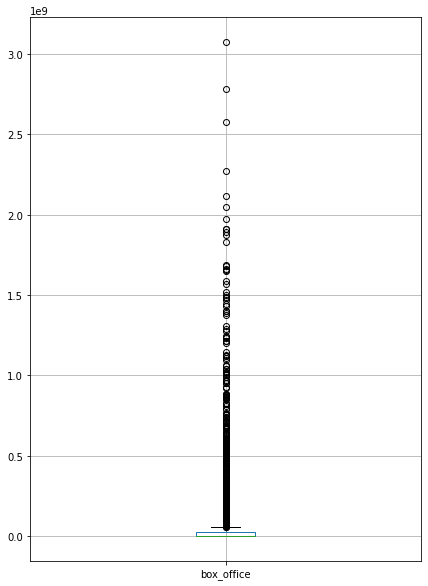

In [53]:
data.boxplot('box_office', figsize = (7,10))

In [54]:
data[data['box_office'] > 2000000000].sort_values(by = 'box_office', ascending = False)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,sum
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.00,35000000.00,160000000.00,Фонд кино,6.80,комедия,3073568690.79,60000000.00
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,400000000.00,590192191.00,Фонд кино,7.50,"спорт,драма",2779686144.00,400000000.00
6820,Мстители: Финал,121005519,2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,missing,7.60,"фантастика,боевик,драма",2576613776.83,NaN
6549,Т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.00,120000000.00,563784717.00,Фонд кино,6.50,"драма,военный,боевик",2271754004.52,180000000.00
3488,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,missing,6.60,"фэнтези,боевик,комедия",2118396119.00,NaN
2859,Зверополис,124000316,2016-02-15 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,«6+» - для детей старше 6 лет,NaN,NaN,NaN,missing,8.30,"мультфильм,комедия,криминал",2048126108.00,NaN


Даные реальные, аномалий нет.

In [55]:
data[data['box_office'] < 50000]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,sum
1610,Иллюзия обмана,121014013,2013-05-27 12:00:00+00:00,Художественный,"Саммит Интертейнмент, К/О Пепе Продакшн, Си Ми...",Франция-США,Луи Летерье,"Бобби Коэн, Алекс Куртцман, Роберто Орси",«12+» - для детей старше 12 лет,NaN,NaN,NaN,missing,7.70,"триллер,криминал,детектив",48300.00,NaN
2946,Пришествие,126002116,2016-04-05 12:00:00+00:00,Прочие,"Инди Филм, Магик Хоур Филмз, Мука Фильми Оу, Н...",Дания - Австрия - Ирландия - Финляндия - Норве...,Майкл Мэдсен,Лиз Ленсе-Моллер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,missing,5.70,ужасы,47800.00,NaN
2756,Хозяин джунглей,121008015,2015-04-13 12:00:00+00:00,Художественный,"Магма Сине, Бонанира Филмз, Мани Филмз, Канана...",Аргентина - Мексика - Бразилия - Франция - США,Пабло Фендрик,"Гаэль Гарсиа Берналь, Хуан Пабло Гильотта, Нат...",«18+» - запрещено для детей,NaN,NaN,NaN,missing,5.10,"драма,вестерн",47780.00,NaN
2720,Форс-мажор.,121009215,2015-04-27 12:00:00+00:00,Художественный,"Мотлис, Платформ Продакшн, Рон-Альпс Синема, С...",Швеция - Франция - Норвегия - Дания,Рубен Эстлунд,"Филипп Бобер, Эрик Хеммендорф, Мари Челльсон",«18+» - запрещено для детей,NaN,NaN,NaN,missing,8.60,"драма,комедия",47005.00,NaN
1124,Замбезия,124001712,2012-08-15 12:00:00+00:00,Анимационный,"Синема Менеджмент Груп, Дэ Тэ И, Эн Эф Вэ Эф, ...",ЮАР,Вейн Тонли,"Грег Бекер, Клер Бекер, Ванесса Синден",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,missing,6.30,"мультфильм,комедия,приключения",46556.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,missing,7.40,"аниме,мультфильм,драма",0.00,NaN
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,missing,7.70,"аниме,мультфильм,фантастика",0.00,NaN
2442,Звездный мальчик,111013915,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"Е.Зильберштейн, А.Дудоров",unkn,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,missing,7.50,драма,0.00,NaN
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,missing,7.90,биография,0.00,NaN


Кассовые сборы фильма "люблю твою жену" в реальности выше 90 тыс. рублей. Нули скорее всего проставлены у фильмов, информации о сборах которых не было изначально. Заменим пропусками. 

In [56]:
data['box_office'] = data['box_office'].replace(0.00, np.nan)

В некоторых строках обнаружено несовпадение с реальными данными. Например, сборы фильма "иллюзия обмана" в реальности превышает миллиард, "замбезия" - 3 миллиарда, в нашем датафреме у обоих меньше 50 тыс. При этом у других фильмов, например "хозяин джунглей" данные совпадают с реальностью. Эмпирическим путем выявлено, что проблемы с данными начинаются именно со значения 50 тыс. рублей. Проверим, сколько строк осталось в выборке после замены нулей.

In [57]:
len(data[data['box_office'] < 50000])/data['box_office'].count()

0.21576898118105126

In [58]:
len(data[data['box_office'] < 2000])/data['box_office'].count()

0.09474367293964958

In [59]:
data['box_office'] = data['box_office'].fillna(9999999999)
data = data.query('box_office > 2000')
data['box_office'] = data['box_office'].replace(9999999999, np.nan)

### Декомпозиция исходного датафрейма <a id="24"></a>


Создадим столбец с информацией о годе проката:

In [60]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year

Также создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [61]:
def first_val(val):
    new_val = val.split(',')
    return new_val[0]
    
data['main_director'] = data['director'].apply(first_val)
data['main_genre'] = data['genres'].apply(first_val)

Добавим столбец с информацией о том, какую долю от общего бюджета фильма составляет государственная поддержка.

In [62]:
data['percent_support'] = round((data['refundable_support'] + data['nonrefundable_support']) / data['budget'], 2)

In [63]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,sum,year,main_director,main_genre,percent_support
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.00,...,160000000.00,Фонд кино,6.80,комедия,3073568690.79,60000000.00,2019,К.Шипенко,комедия,0.38
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,...,590192191.00,Фонд кино,7.50,"спорт,драма",2779686144.00,400000000.00,2017,А.Мегердичев,спорт,0.68
6820,Мстители: Финал,121005519,2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,...,NaN,missing,7.60,"фантастика,боевик,драма",2576613776.83,NaN,2019,Джо Руссо,фантастика,NaN
6549,Т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.00,...,563784717.00,Фонд кино,6.50,"драма,военный,боевик",2271754004.52,180000000.00,2018,А.Сидоров,драма,0.32
3488,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,...,NaN,missing,6.60,"фэнтези,боевик,комедия",2118396119.00,NaN,2017,Йоаким Реннинг,фэнтези,NaN
2859,Зверополис,124000316,2016-02-15 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,«6+» - для детей старше 6 лет,NaN,...,NaN,missing,8.30,"мультфильм,комедия,криминал",2048126108.00,NaN,2016,Рич Мур,мультфильм,NaN
3755,Тайная жизнь домашних животных. Миньоны против...,124002816,2016-07-05 12:00:00+00:00,Анимационный,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз",США,Крис Рено,Кристофер Меледандри,«6+» - для детей старше 6 лет,NaN,...,NaN,missing,6.70,"мультфильм,короткометражка,комедия",1971005085.00,NaN,2016,Крис Рено,мультфильм,NaN
6274,Веном,121022018,2018-10-04 12:00:00+00:00,Художественный,"Коламбиа Пикчерз, Марвел Интертейнмент, Паскал...",США,Рубен Флейшер,"Ави Арад, Эми Паскаль, Мэтт Толмак",«16+» - для детей старше 16 лет,NaN,...,NaN,missing,6.80,"боевик,фантастика,триллер",1913257923.06,NaN,2018,Рубен Флейшер,боевик,NaN
7216,Малефисента: Владычица тьмы,121026219,2019-10-04 12:00:00+00:00,Художественный,"Рот Филмз, Уолт Дисней Пикчерз",США,Йоаким Роннинг,"Анджелина Джоли, Джо Рот, Дункан Хендерсон",«6+» - для детей старше 6 лет,NaN,...,NaN,missing,6.90,"фэнтези,приключения,семейный",1911944865.95,NaN,2019,Йоаким Роннинг,фэнтези,NaN
7258,Джокер,121027519,2019-10-03 12:00:00+00:00,Художественный,"Брон Студиос, Ди Си Комикс, Джоинт Эффорт, Вил...",США - Канада,Тодд Филлипс,"Брэдли Купер, Эмма Тиллинджер Коскофф, Тодд Фи...",«18+» - запрещено для детей,NaN,...,NaN,missing,8.00,"триллер,драма,криминал",1890368076.47,NaN,2019,Тодд Филлипс,триллер,NaN


In [64]:
data['percent_support'].describe()

count   312.00
mean      0.52
std       0.17
min       0.04
25%       0.37
50%       0.59
75%       0.66
max       0.78
Name: percent_support, dtype: float64

### Исследовательский анализ данных <a id="3"></a>


Посмотрим, сколько фильмов выходило в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов, поэтому также посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [65]:
data['year'].value_counts()

2019    892
2018    870
2016    721
2010    714
2014    666
2015    654
2013    520
2017    497
2012    476
2011    437
Name: year, dtype: int64

In [66]:
(len(data) - data['box_office'].isna().sum() + len(data.query('box_office == 0'))) / len(data)

0.4322940902745463

Больше чем в половине данных информация о прокате не представлена. Посмотрим, какой период полнее всего представлен в данных.

In [67]:
data['box_office'] = data['box_office'].fillna(1)

In [68]:
box_off = data.query('box_office !=1')

In [69]:
data['box_office'] = data['box_office'].replace(1, np.nan)

In [70]:
year_box_off = box_off.pivot_table(index = 'year', values = 'box_office', aggfunc=['count', 'mean','median','sum'])
year_box_off.columns = ['count', 'mean','median', 'sum']

In [71]:
year_box_off

,count,mean,median,sum
year,,,,
2010,48,49852.73,6612.50,2392931.00
2011,62,225900.23,7242.50,14005814.00
2012,75,92253.64,16330.00,6919023.00
2013,108,275133.00,10897.50,29714364.20
2014,199,37360014.04,180700.00,7434642793.10
2015,443,86969481.17,5350538.00,38527480159.09
2016,501,93297522.80,4628842.94,46742058922.48
2017,355,136501823.25,9919415.00,48458147253.75
2018,470,104788094.01,8821498.98,49250404183.69


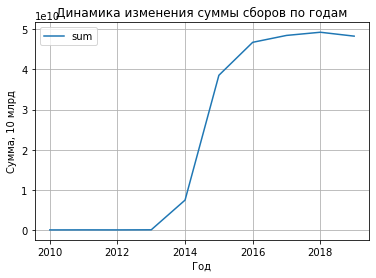

In [72]:
year_box_off.plot(y='sum', grid = True)
plt.title('Динамика изменения суммы сборов по годам')
plt.xlabel('Год')
plt.ylabel('Сумма, 10 млрд');

In [73]:
print('Максимальная сумма сборов:\n', year_box_off[year_box_off['sum'] == year_box_off['sum'].max()])

Максимальная сумма сборов:
       count         mean     median            sum
year                                              
2018    470 104788094.01 8821498.98 49250404183.69


In [74]:
print('Минимальная сумма сборов:\n', year_box_off[year_box_off['sum'] == year_box_off['sum'].min()])

Минимальная сумма сборов:
       count     mean  median        sum
year                                   
2010     48 49852.73 6612.50 2392931.00


По графику виден рост динамики проката с 2013 по 2019 год. По таблице видно, что больше всего данных у нас с 2015 по 2019 год, поэтому и наблюдается такой резкий подъем. Остановимся на этом периоде.


Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.

In [75]:
new_box_off = box_off.query('year >= 2015')

In [76]:
new_box_off_age = new_box_off.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc=['count', 'mean','median','sum'])
new_box_off_age.columns = ['count', 'mean','median', 'sum']
new_box_off_age

,count,mean,median,sum
age_restriction,,,,
«0+» - для любой зрительской аудитории,83,9747329.59,3140318.00,809028355.97
«12+» - для детей старше 12 лет,338,175647025.79,5658347.75,59368694717.50
«16+» - для детей старше 16 лет,789,95186427.75,5667338.21,75102091496.60
«18+» - запрещено для детей,785,51918329.45,6375092.00,40755888618.59
«6+» - для детей старше 6 лет,300,184066051.42,14998944.91,55219815425.92


<AxesSubplot:ylabel='age_restriction'>

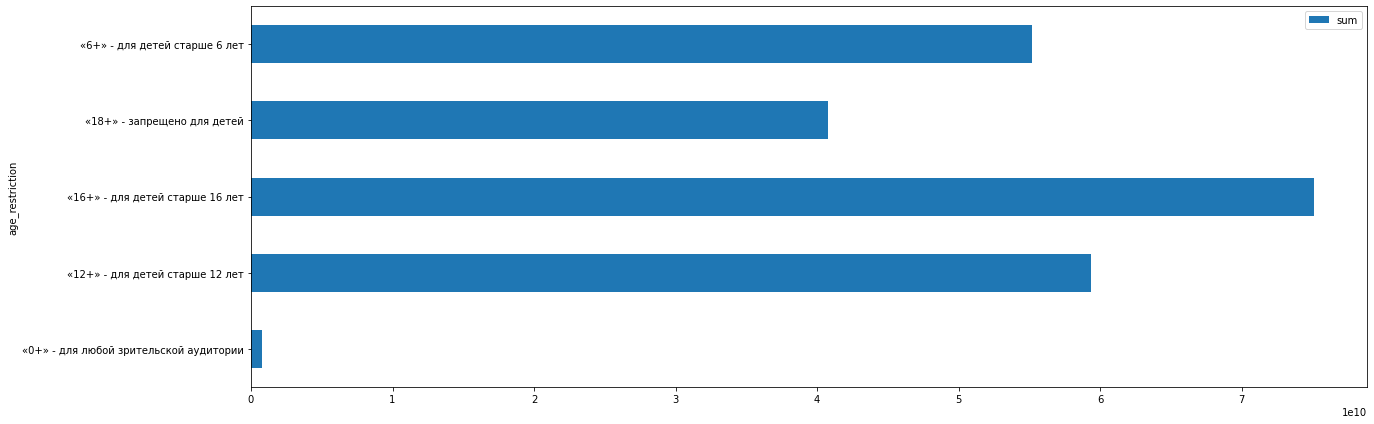

In [77]:
new_box_off_age.plot(y = 'sum', figsize = (20,7), kind = 'barh')

In [78]:
new_box_off_age[new_box_off_age['sum'] ==new_box_off_age['sum'].min()]

,count,mean,median,sum
age_restriction,,,,
«0+» - для любой зрительской аудитории,83,9747329.59,3140318.00,809028355.97


In [79]:
new_box_off_age[new_box_off_age['sum'] ==new_box_off_age['sum'].max()]

,count,mean,median,sum
age_restriction,,,,
«16+» - для детей старше 16 лет,789,95186427.75,5667338.21,75102091496.60


Больше всего денег в прокате собрали фильмы 16+, меньше всего - 0+. Проверим, меняется ли картина в зависимости от года.

In [80]:
def age_vs_year(condition, data = box_off):
    a = data.query(condition)
    b = a.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc=['count', 'mean','median','sum'])
    b.columns = ['count', 'mean','median', 'sum']
    return b.plot(y = 'sum', figsize = (20,3), kind = 'barh')

<AxesSubplot:ylabel='age_restriction'>

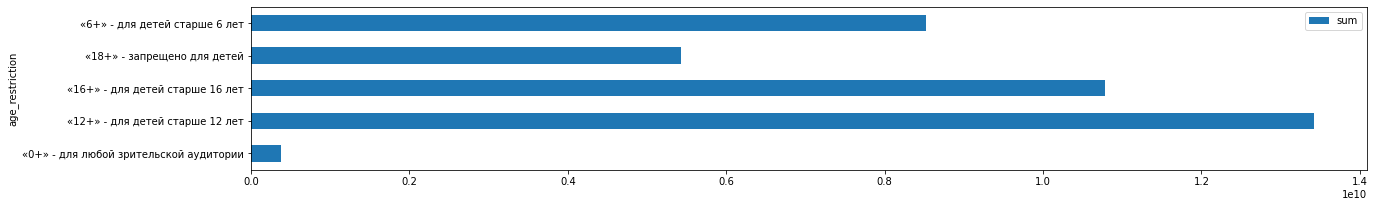

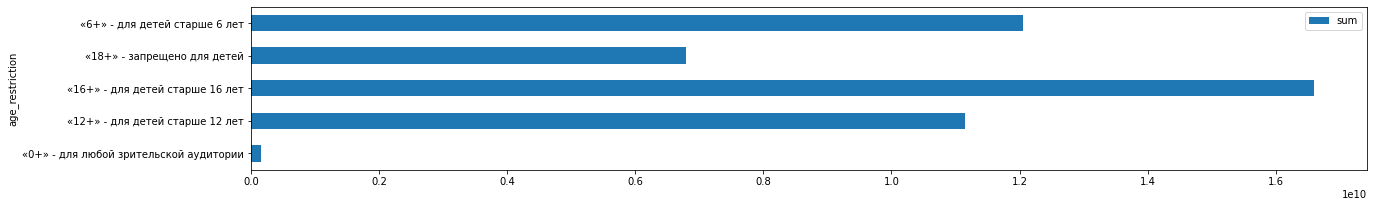

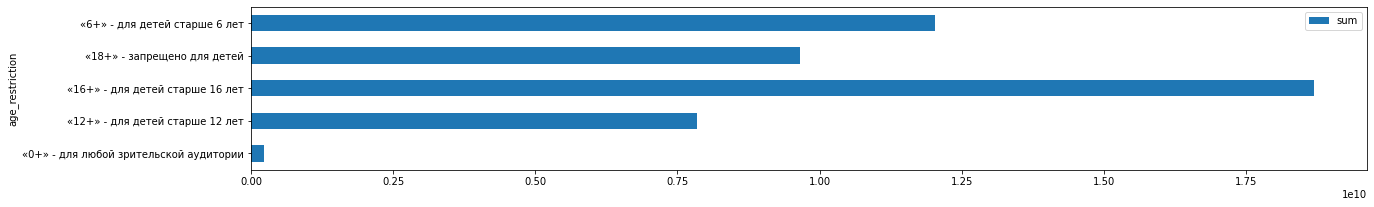

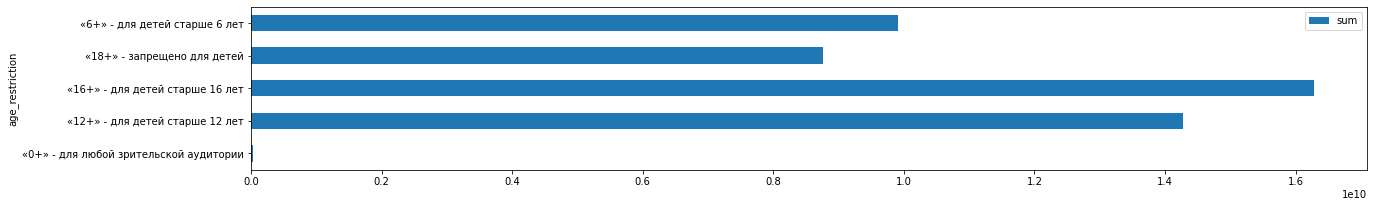

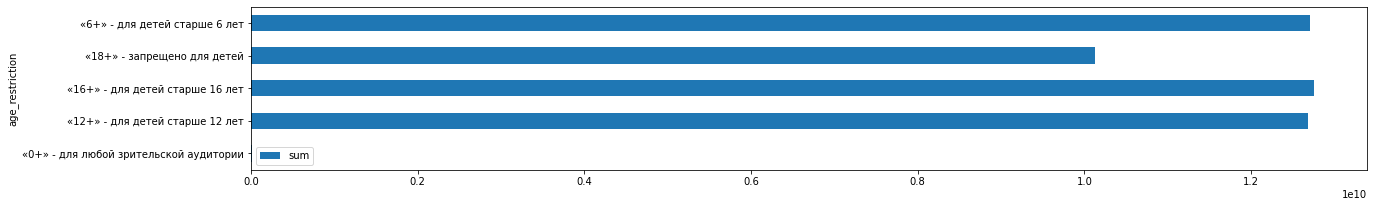

In [81]:
age_vs_year('year == 2015')
age_vs_year('year == 2016')
age_vs_year('year == 2017')
age_vs_year('year == 2018')
age_vs_year('year == 2019')

Изменения есть но незначительные. В 2015 и 2019 году, видимо, выходили долгожданные фильмы известных режиссеров или с лучшим кастом, поэтому категория 12+ превзошла 16+.

Исследуем фильмы, которые получили государственную поддержку.

In [82]:
gos_films = data.query('budget != 0')

Добавим столбец с общей суммой гос.поддержки.

In [83]:
gos_films['gos_sup'] = gos_films['refundable_support'] + gos_films['nonrefundable_support']

In [84]:
gos_films.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,sum,year,main_director,main_genre,percent_support,gos_sup
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.00,...,Фонд кино,6.80,комедия,3073568690.79,60000000.00,2019,К.Шипенко,комедия,0.38,60000000.00
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,...,Фонд кино,7.50,"спорт,драма",2779686144.00,400000000.00,2017,А.Мегердичев,спорт,0.68,400000000.00
6820,Мстители: Финал,121005519,2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,...,missing,7.60,"фантастика,боевик,драма",2576613776.83,NaN,2019,Джо Руссо,фантастика,NaN,NaN
6549,Т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.00,...,Фонд кино,6.50,"драма,военный,боевик",2271754004.52,180000000.00,2018,А.Сидоров,драма,0.32,180000000.00
3488,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,...,missing,6.60,"фэнтези,боевик,комедия",2118396119.00,NaN,2017,Йоаким Реннинг,фэнтези,NaN,NaN
2859,Зверополис,124000316,2016-02-15 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,«6+» - для детей старше 6 лет,NaN,...,missing,8.30,"мультфильм,комедия,криминал",2048126108.00,NaN,2016,Рич Мур,мультфильм,NaN,NaN
3755,Тайная жизнь домашних животных. Миньоны против...,124002816,2016-07-05 12:00:00+00:00,Анимационный,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз",США,Крис Рено,Кристофер Меледандри,«6+» - для детей старше 6 лет,NaN,...,missing,6.70,"мультфильм,короткометражка,комедия",1971005085.00,NaN,2016,Крис Рено,мультфильм,NaN,NaN
6274,Веном,121022018,2018-10-04 12:00:00+00:00,Художественный,"Коламбиа Пикчерз, Марвел Интертейнмент, Паскал...",США,Рубен Флейшер,"Ави Арад, Эми Паскаль, Мэтт Толмак",«16+» - для детей старше 16 лет,NaN,...,missing,6.80,"боевик,фантастика,триллер",1913257923.06,NaN,2018,Рубен Флейшер,боевик,NaN,NaN
7216,Малефисента: Владычица тьмы,121026219,2019-10-04 12:00:00+00:00,Художественный,"Рот Филмз, Уолт Дисней Пикчерз",США,Йоаким Роннинг,"Анджелина Джоли, Джо Рот, Дункан Хендерсон",«6+» - для детей старше 6 лет,NaN,...,missing,6.90,"фэнтези,приключения,семейный",1911944865.95,NaN,2019,Йоаким Роннинг,фэнтези,NaN,NaN
7258,Джокер,121027519,2019-10-03 12:00:00+00:00,Художественный,"Брон Студиос, Ди Си Комикс, Джоинт Эффорт, Вил...",США - Канада,Тодд Филлипс,"Брэдли Купер, Эмма Тиллинджер Коскофф, Тодд Фи...",«18+» - запрещено для детей,NaN,...,missing,8.00,"триллер,драма,криминал",1890368076.47,NaN,2019,Тодд Филлипс,триллер,NaN,NaN


In [85]:
gos_films.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,sum,year,percent_support,gos_sup
count,6447.00,312.00,312.00,312.00,5499.00,2787.00,312.00,6447.00,312.00,312.00
mean,129934646.30,11394230.77,47143329.64,131939954.93,6.46,85663148.02,58537560.41,2014.91,0.52,58537560.41
std,32955380.41,24752011.41,56715329.54,186472215.39,1.11,253430828.43,68980843.96,2.96,0.17,68980843.96
min,0.00,0.00,0.00,14462464.00,1.00,2015.00,3000000.00,2010.00,0.04,3000000.00
25%,112004668.50,0.00,25000000.00,46153876.75,5.80,447186.75,25275000.00,2012.00,0.37,25275000.00
50%,121013319.00,0.00,30000000.00,72448592.50,6.60,3671674.50,35000000.00,2015.00,0.59,35000000.00
75%,124000110.50,10000000.00,40000000.00,150002143.25,7.20,32807405.80,60000000.00,2018.00,0.66,60000000.00
max,231001012.00,180000000.00,400000000.00,2305074303.00,9.10,3073568690.79,500000000.00,2019.00,0.78,500000000.00


Среднее 35 000 000, медиана 59 710 220.
Максимальная сумма поддержки государства = 500 млн.

<AxesSubplot:xlabel='year'>

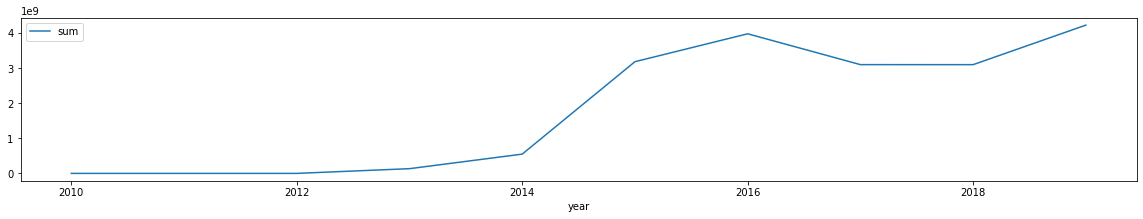

In [86]:
gos_films_year = gos_films.pivot_table(index = 'year', values = 'gos_sup', aggfunc=['count', 'mean','median','sum'])
gos_films_year.columns = ['count', 'mean','median', 'sum']
gos_films_year.plot(y = 'sum', figsize = (20,3))

С 2014 года государство выделяет все больше бюджета на съемки отечественных фильмов. 

In [87]:
pd.set_option('display.max_columns', None)
gos_films[gos_films['gos_sup'] == gos_films['gos_sup'].max()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,sum,year,main_director,main_genre,percent_support,gos_sup
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,500000000.00,2019,А.Кравчук,история,0.51,500000000.00


Максимальные суммы получили фильмы 'Союз спасения' и 'Вторжение'.

Создадим сводную таблицу, чтобы понять окупаются ли такие фильмы.

In [88]:
gos_films_gain = gos_films.query('box_office != 0')

In [89]:
gos_films_gain_pivot = gos_films_gain.pivot_table(index = 'title', values = ['refundable_support', 'nonrefundable_support', 'gos_sup', 'budget', 'box_office'])
gos_films_gain_pivot['gain'] = gos_films_gain_pivot['box_office'] - gos_films_gain_pivot['budget'] 
gos_films_gain_pivot['gain_vs_debt'] = gos_films_gain_pivot['box_office'] - gos_films_gain_pivot['budget'] + gos_films_gain_pivot['nonrefundable_support']
gos_films_gain_pivot.head(10)

,box_office,budget,gos_sup,nonrefundable_support,refundable_support,gain,gain_vs_debt
title,,,,,,,
Я ПРЕПОД,145448.00,NaN,NaN,NaN,NaN,NaN,NaN
#ВСЁ_ИСПРАВИТЬ!?!,15206808.84,NaN,NaN,NaN,NaN,NaN,NaN
#Москва-Руаян,264015.00,NaN,NaN,NaN,NaN,NaN,NaN
(Не)идеальный мужчина,NaN,150147502.00,100000000.00,60000000.00,40000000.00,NaN,NaN
... в стиле JAZZ,5620.00,NaN,NaN,NaN,NaN,NaN,NaN
... и я там был,73180.00,NaN,NaN,NaN,NaN,NaN,NaN
007: Спектр,767274597.90,NaN,NaN,NaN,NaN,NaN,NaN
1+1. Нарушая правила,1123910.00,NaN,NaN,NaN,NaN,NaN,NaN
1+1: Голливудская история,21919521.32,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
gos_films_gain_pivot['gain'].describe()

count           299.00
mean       -3730196.95
std       321453149.77
min     -1971477243.41
25%       -72996434.00
50%       -43363736.00
75%       -14220096.27
max      2913568690.79
Name: gain, dtype: float64

- -42 959 950 - среднее, 10 653 040 - медиана
- -725 698 800 - минимальное значение
- 2 913 569 000 - максимальное

<AxesSubplot:ylabel='Frequency'>

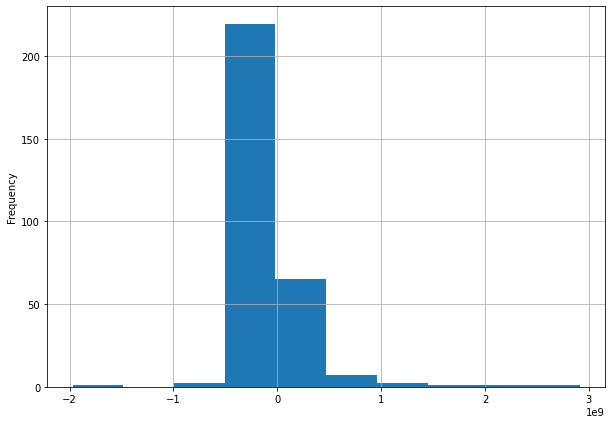

In [91]:
gos_films_gain_pivot['gain'].plot(kind = 'hist', grid=True, figsize = (10,7))

Посмотрим на ту же информацию, с учетом невозвратных средств гос.поддержки.

In [92]:
gos_films_gain_pivot['gain_vs_debt'].describe()

count           299.00
mean       44293879.46
std       333140650.54
min     -1881477243.41
25%       -37996434.00
50%       -13543373.50
75%        17120142.01
max      2948568690.79
Name: gain_vs_debt, dtype: float64

- -13 543 370 среднее, 58 507 520 медиана
- -665 698 800 минимальное значение
- 2 948 569 000 максимальное

<AxesSubplot:ylabel='Frequency'>

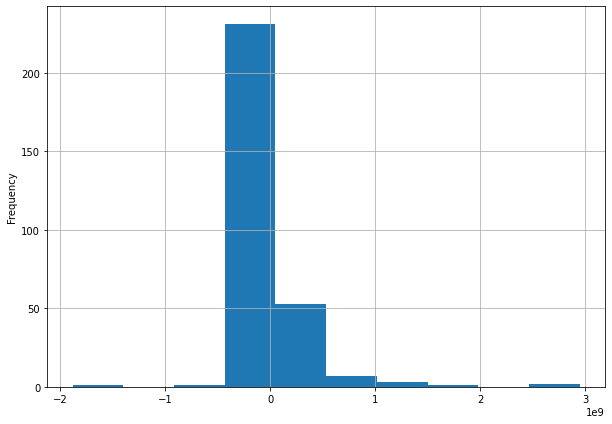

In [93]:
gos_films_gain_pivot['gain_vs_debt'].plot(kind = 'hist', grid=True, figsize = (10,7))

В обоих случаях фильмы скорее не окупаются. Но потери при этом небольшие.

In [94]:
gos_films['ratings'].describe()

count   5499.00
mean       6.46
std        1.11
min        1.00
25%        5.80
50%        6.60
75%        7.20
max        9.10
Name: ratings, dtype: float64

Люди оценивают фильмы с гос.поддержкой в среднем на 6 баллов из 10.

Посмотрим, фильмы какого типа и жанра скорее получат гос.поддержку:

<AxesSubplot:ylabel='type'>

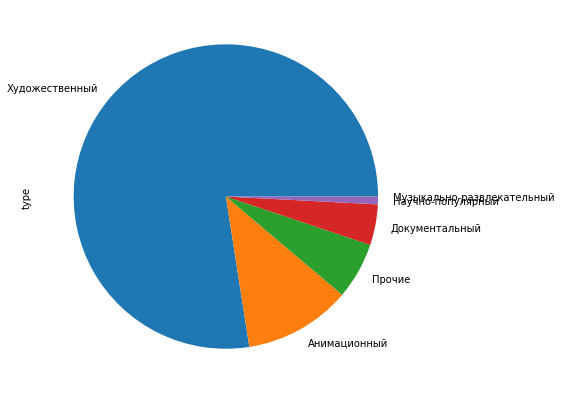

In [95]:
gos_films['type'].value_counts().plot(kind="pie", figsize = (7,7))

<AxesSubplot:ylabel='main_genre'>

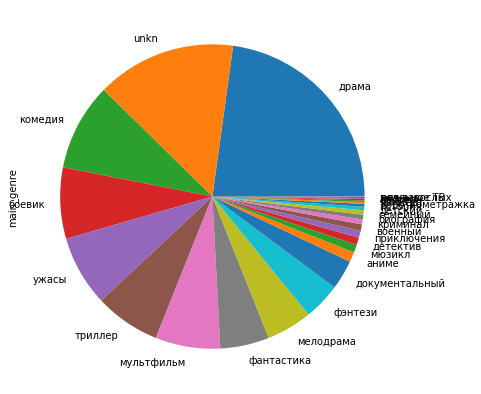

In [96]:
gos_films['main_genre'].value_counts().plot(kind="pie", figsize = (7,7))

Художественные фильмы в жанре 'комедия' или 'драма'.

<AxesSubplot:ylabel='financing_source'>

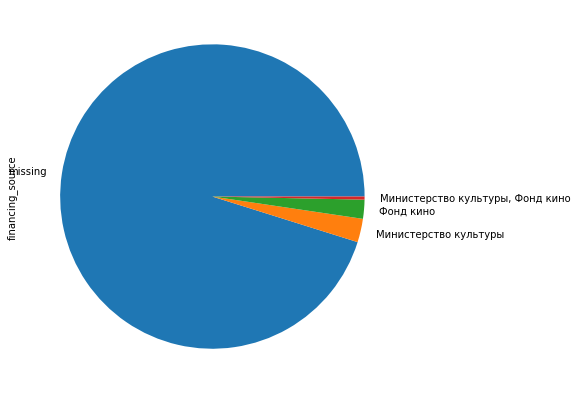

In [97]:
gos_films['financing_source'].value_counts().plot(kind="pie", figsize = (7,7))

Основным спонсором является Министерство культуры.

Интересно посмотреть и каким режиссерам с большей охотой помогает государство чаще всего:

In [98]:
gos_films_director = gos_films.pivot_table(index= 'main_director', values = 'nonrefundable_support', aggfunc=['count', 'mean','median','sum'])
gos_films_director.columns = ['count', 'mean','median', 'sum']
gos_films_director.sort_values(by='count', ascending=False).head(10)

,count,mean,median,sum
main_director,,,,
Р.Давлетьяров,5,78969589.00,97000000.00,394847945.00
Д.Дьяченко,4,45000000.00,37500000.00,180000000.00
С.Андреасян,4,65000000.00,40000000.00,260000000.00
А.Цицилин,3,66666666.67,60000000.00,200000000.00
К.Шипенко,3,95666666.67,35000000.00,287000000.00
А.Аксененко,3,21666666.67,25000000.00,65000000.00
А.Котт,3,34666666.67,29000000.00,104000000.00
Д.Шмидт,3,38333333.33,40000000.00,115000000.00
В.Тодоровский,2,135000000.00,135000000.00,270000000.00


И кому выдает бОльшие суммы:

In [99]:
gos_films_director.sort_values(by='sum', ascending=False).head(10)

,count,mean,median,sum
main_director,,,,
Н.Хомерики,2,250000000.00,250000000.00,500000000.00
А.Мегердичев,1,400000000.00,400000000.00,400000000.00
А.Кравчук,1,400000000.00,400000000.00,400000000.00
Р.Давлетьяров,5,78969589.00,97000000.00,394847945.00
Н.Лебедев,1,392104482.00,392104482.00,392104482.00
А.Мизгирев,1,300000000.00,300000000.00,300000000.00
К.Шипенко,3,95666666.67,35000000.00,287000000.00
В.Тодоровский,2,135000000.00,135000000.00,270000000.00
П.Лунгин,2,131500000.00,131500000.00,263000000.00


## Общий вывод <a id="4"></a>

В ходе проведенного исследования мы установили следующее:

- Сумма сбора проката меняется с 2013 по по 2019 год, она постоянно растет.
- Наибольшие суммы сборов наблюдаются у фильмов категории '16+', немного меньше у категории '12+', при этом от года проката это не зависит.
- Максимальная сумма государственной поддержки российских фильмов постоянно растет. Чаще всего ее получают художественные фильмы жанров 'драма' и 'комедия'. Главным спосором является Министерство культуры. Пока такие фильмы получают не самый высокий рейтинг (в среднем 6 баллов из 10), кроме того, больше, чем в половине случаев они не окупаются.
